In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv(r'C:\Users\Natalia\Downloads\facebook_ads_data.csv')

print(df)

         ad_date campaign_name  total_spend  total_impressions  total_clicks  \
0     2022-11-05     Expansion         0.00                  0             0   
1     2022-11-01     Expansion         0.00                  0             0   
2     2022-10-31     Expansion       227.45               6054            58   
3     2022-10-30     Expansion       335.91              27562            69   
4     2022-10-29     Expansion       714.03              33358           115   
...          ...           ...          ...                ...           ...   
1489  2020-11-15     Discounts         6.98              12465           657   
1490  2020-11-14     Discounts         7.27               5005           392   
1491  2020-11-13     Discounts         6.36              11669           451   
1492  2020-11-12     Discounts        23.00              10473           397   
1493  2020-11-11     Discounts         1.89               1800            45   

      total_value   cpc    cpm       ct

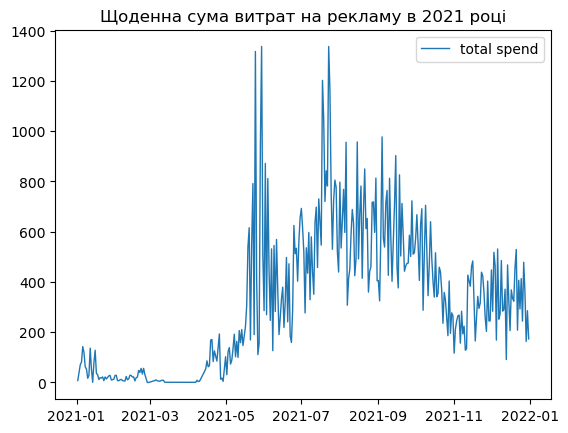

In [42]:
df['ad_date'] = pd.to_datetime(df['ad_date'])
filt=df[(df['ad_date'] > '2021-01-01') &(df['ad_date'] < '2022-01-01')]
df1=filt.groupby('ad_date')[['total_spend','romi']].sum()

plt.plot(df1['total_spend'], linewidth=1, label='total spend')
plt.title('Щоденна сума витрат на рекламу в 2021 році')
plt.legend()
plt.show()

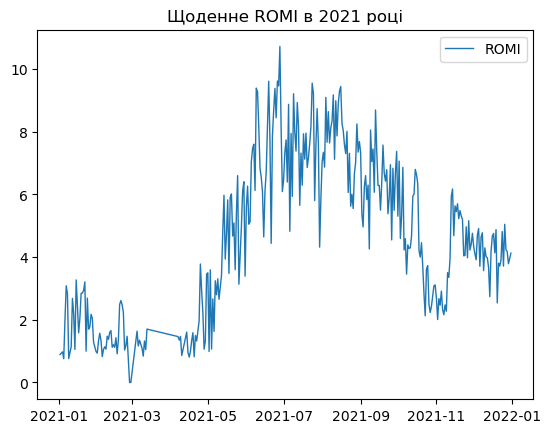

In [45]:
df['ad_date'] = pd.to_datetime(df['ad_date'])
plt.plot(df1['romi'], linewidth=1, label='ROMI')
plt.title('Щоденне ROMI в 2021 році')
plt.legend()
plt.show()

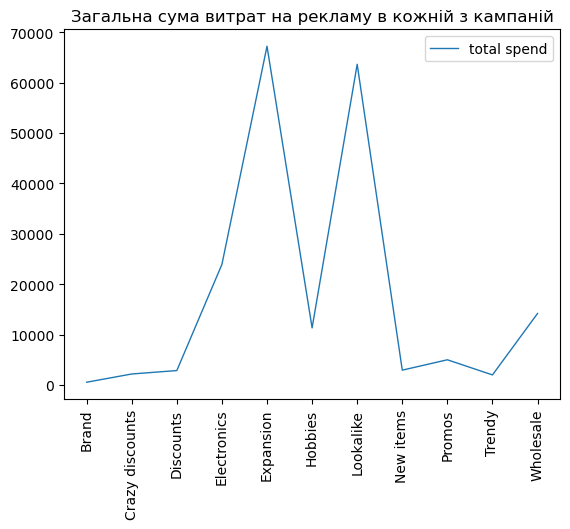

In [71]:
df2=df.groupby('campaign_name')[['total_spend','romi']].sum()
plt.plot(df2['total_spend'], linewidth=1, label='total spend')
plt.title('Загальна сума витрат на рекламу в кожній з кампаній')
plt.xticks(rotation=90)
plt.legend()
plt.show()

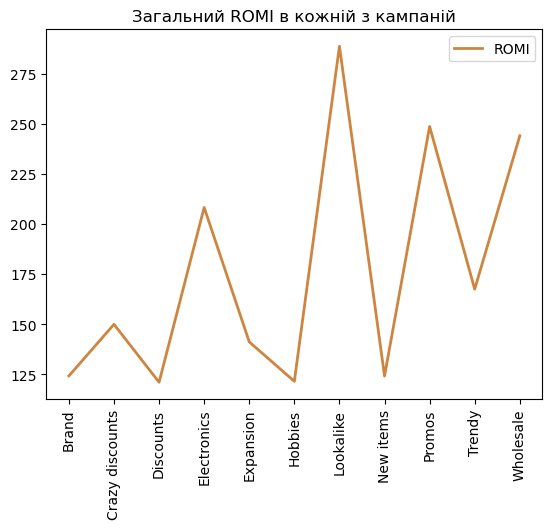

In [70]:
plt.plot(df2['romi'], color='peru', linewidth=2, label='ROMI')
plt.title('Загальний ROMI в кожній з кампаній')
plt.xticks(rotation=90)
plt.legend()
plt.show()

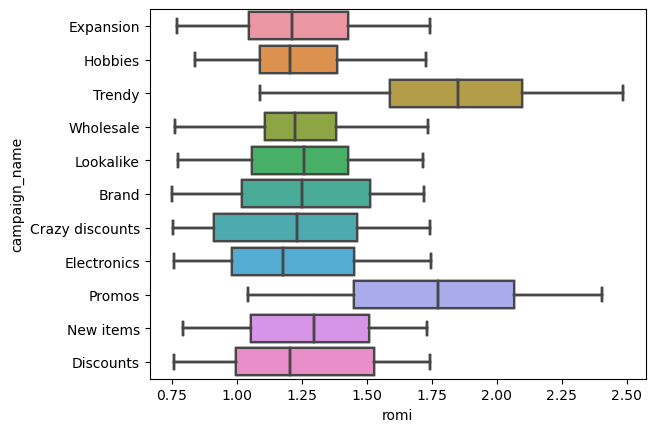

In [62]:
# Pозкид щоденного ROMI в кожній кампаній
dfnew=df[['ad_date', 'campaign_name', 'romi']]

n=dfnew['campaign_name'].unique()

for cmp in n:
    sns.boxplot(data=dfnew, x='romi', y='campaign_name') 
    

C:\Users\Natalia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


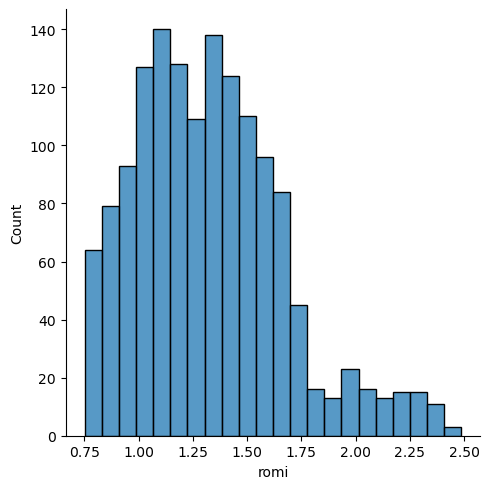

In [20]:
# Гістограма з розподілом значень ROMI в таблиці facebook_ads_data.csv
sns.displot(data=df,x='romi')

<Axes: >

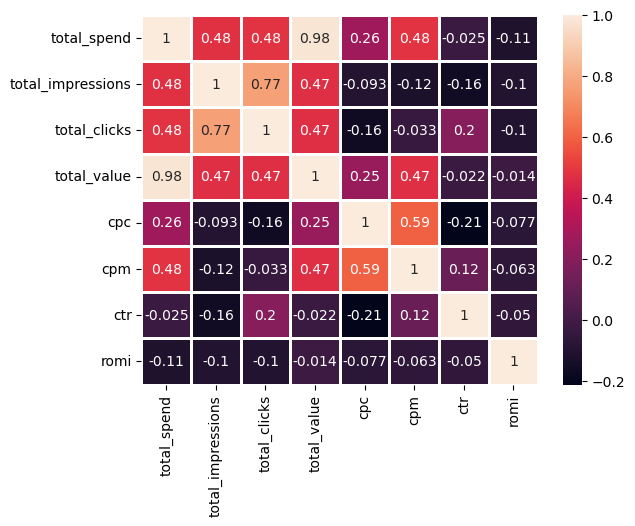

In [23]:
# Теплова карта кореляції між усіма числовими показниками в таблиці facebook_ads_data.csv
fields = ['total_spend','total_impressions','total_clicks','total_value','cpc','cpm','ctr','romi']
df1 = df[fields]

sns.heatmap(df1.corr(), linewidths=1,annot=True)

C:\Users\Natalia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


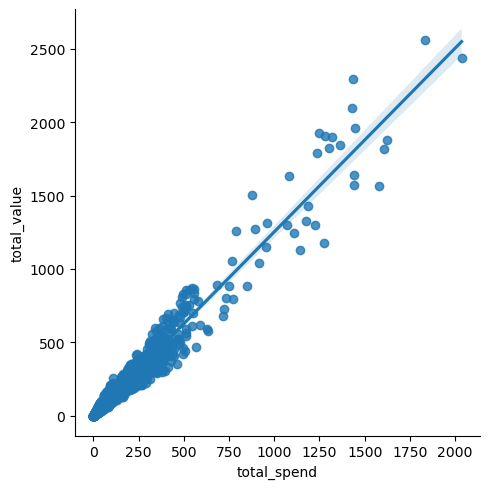

In [63]:
# Точкова діаграма з лінійною регресією 
sns.lmplot(data=df,x='total_spend',y='total_value')